# Assignment Overview

Links to the notes discussed in the video
* [Model Selection Overview](./ModelSelect.pdf)
* [Model Types](./ModelType.pdf)
* [Model Decision Factors](./ModelDecisionFactors.pdf)
* [Generalization Techiques](./Generalization.pdf)

The assignment consists of two parts requiring you to select appropriate models with associated code/text.

1. Determine challenge and relevant model for two distinct situations (fill out this notebook). 
1. Address the data code needed and the model for [car factors](./CarFactors/carfactors.ipynb) contained in the subdirectory, CarFactors.

* ***Check the rubric in Canvas*** to make sure you understand the requirements and the assocated weights grading

# Part 1: Speed Dating Model Selection

You are to explore the data set on speed dating and construct two models that provide some insight such as grouping or predictions.  The models must come from different model areas such as listed as categories in the [ModelTypes](./ModelTypes.pdf) document.  You must justify your answer considering the data and the prediction value.

The data is contained in [SpeedDatingData.csv](SpeedDatingData.csv).  The values are detailed in [SpeedDatingKey.md](./SpeedDatingKey.md).  The directory also contains the original key document - SpeedDatingDataKey.docx but jupyter lab is unable to render it.  You are free to render it outside of jupyter lab if something didn't translater clearly.  The open source tool [pandoc](https://pandoc.org/installing.html) was used to perform the translation.  It is useful for almost any translation and works in all major operating systems

In [1]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 
!pip install basemap

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from IPython.display import display, HTML

# Display Properties
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set(style="ticks", color_codes=True)

In [3]:
# The dataset has been added to this git repository and so we will read it from the current location
df = pd.read_csv("SpeedDatingData.csv")

# Printing the shape tells us the volume (rows) and dimensionality (columns) of the data
data_shape = df.shape
print(f'# The dataset has {data_shape[0]} rows and {data_shape[1]} columns')

# The dataset has 8378 rows and 195 columns


In [4]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.000,0,1,1,1,10,7,NaN,4,1,11.000,0,0.140,0,27.000,2.000,35.000,20.000,20.000,20.000,0.000,5.000,0,6.000,8.000,8.000,8.000,8.000,6.000,7.000,4.000,2.000,21.000,Law,1.000,NaN,NaN,NaN,4.000,2.000,4.000,Chicago,60521.000,69487.000,2.000,7.000,1.000,lawyer,NaN,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,35.000,20.000,15.000,20.000,5.000,5.000,6.000,8.000,8.000,8.000,7.000,NaN,NaN,NaN,NaN,NaN,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,19.440,16.670,13.890,22.220,11.110,16.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,7.000,8.000,7.000,6.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,0.000,NaN,NaN,15.000,20.000,20.000,15.000,15.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,7.000,7.000,7.000,7.000,NaN,NaN,NaN,NaN,NaN
1,1,1.000,0,1,1,1,10,7,NaN,3,2,12.000,0,0.540,0,22.000,2.000,60.000,0.000,0.000,40.000,0.000,0.000,0,7.000,8.000,10.000,7.000,7.000,5.000,8.000,4.000,2.000,21.000,Law,1.000,NaN,NaN,NaN,4.000,2.000,4.000,Chicago,60521.000,69487.000,2.000,7.000,1.000,lawyer,NaN,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,35.000,20.000,15.000,20.000,5.000,5.000,6.000,8.000,8.000,8.000,7.000,NaN,NaN,NaN,NaN,NaN,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,19.440,16.670,13.890,22.220,11.110,16.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,7.000,8.000,7.000,6.000,NaN,NaN,NaN,NaN,NaN,1.000,1.000,0.000,NaN,NaN,15.000,20.000,20.000,15.000,15.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000,7.000,7.000,7.000,7.000,NaN,NaN,NaN,NaN,NaN
2,1,1.000,0,1,1,1,10,7,NaN,10,3,13.000,1,0.160,1,22.000,4.000,19.000,18.000,19.000,18.000,14.000,12.000,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000,21.000,Law,1.000,NaN,NaN,NaN,4.000,2.000,4.000,Chicago,60521.000,69487.000,2.000,7.000,1.000,lawyer,NaN,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,NaN,NaN,NaN,NaN,NaN,NaN,35.000,20.000,15.000,20.000,5.000,5.000,6.000,8.000,8.000,8.000,7.000,NaN,NaN,

In [5]:
## format and type
display(HTML(df.dtypes.to_frame().to_html()))

,0
iid,int64
id,float64
gender,int64
idg,int64
condtn,int64
wave,int64
round,int64
position,int64
positin1,float64
order,int64


In [6]:
# Let's look at missing values 
display(HTML(df.isna().sum().to_frame().to_html()))

,0
iid,0
id,1
gender,0
idg,0
condtn,0
wave,0
round,0
position,0
positin1,1846
order,0


# Model 1

## Outline the challenge 

This dataset has 195 columns as shown above and hence it is high dimensionality. We will first want to employ some sort of dimensionality reduction algorithm to find out the columns that are relevant 

### Select the features and their justification 

Prior to dimensionality reduction I will remove following dimensions since they are unlikely in determining a compatibility match. The rationale for removing some of the features is below

<b>Set 1:</b> These attributes are all identifiers that are unique or running sequence numbers and unlikely to have a correlation

<ul>
    <li>iid</li>
    <li>id</li>
    <li>idg</li>
    <li>partner</li>
    <li>pid</li>
</ul>

<b>Set 2:</b> These attributes have a high number of missing values and we either have an alternate attribute that can work as a predictor or it is likely not relevant

<ul>
    <li>
        <b>field_cd</b>: This has good amount of missing values and we also have the <b>field</b> attribute that has less missing values and we can use that instead with appropriate encoding
    </li>
    <li>
        <b>positin1</b>: The position where you started to date might not be relevant from a match perspective
    </li>
    <li>
        <b>undergra:</b>While where folks studied undergraduate could be a connecting factor, the lack of this information for almost 50% of the data makes this an unreliable attribute
    </li>
    <li>
        <b>mn_sat:</b>The lack of this information for > 50% of the data makes this an unreliable attribute and this is unlikely to have an impact
    </li>
    <li>
        <b>tuition:</b>The lack of this information for > 50% of the data makes this an unreliable attribute and this is unlikely to have an impact
    </li>
    <li>
        <b>income:</b>The lack of this information for > 50% of the data makes this an unreliable attribute and this is unlikely to have an impact
    </li>
    <li>
        <b>zipcode:</b>We have >10% missing values but we also have <b>from</b> as alternate variable
    </li>
    <li>
        <b>career_c</b>: This has good amount of missing values and we also have the <b>career</b> attribute that has less missing values and we can use that instead with appropriate encoding
    </li>
</ul>

After the above removals, I consider <b>match</b> as the target variable since this enables getting good matches upfront. Many of the other attributes could play a part in the above result could be correlated

<ul>
    <li>
        <b>(attr)1_1</b>: All attributes with this prefix are survey results taken prior to signing up for Speed Dating Event to indicate what the participant thought was important in a partner <b>LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE</b>
    </li>
    <li>
        <b>(attr)4_1</b>: All attributes with this prefix are survey results taken prior to signing up to indicate what the participant thought was important in a partner <b>for their fellow participants</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS IS IMPORTANT FOR FELLOW PARTICIPANTS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b>
    </li>
    <li>
        <b>(attr)2_1</b>: All attributes with this prefix are survey results taken prior to signing up to indicate what the participant thought was important <b>to their potential partner</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b>
    </li>
    <li>
        <b>pf_o_att</b>: All attributes with this prefix are survey results of what the partner thought as <b>actually</b> being important prior to signing up for the Speed Dating event. This is <b>DEFINATELY IMPORTANT FOR PREDICTING A FUTURE DATE</b>
    </li>
    <li>
        <b>(attr)3_1</b>: All attributes with this prefix are survey results taken prior to signing up to indicate what the participant thought <b>of themselves</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b>
    </li>
    <li>
        <b>(attr)5_1</b>: All attributes with this prefix are survey results taken prior to signing up to indicate what the participant thought on <b>how they were perceived</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b>
    </li>
    <li>
        <b>attr_o</b>: All attributes with this prefix are survey results of what the partner thought is important on the day of the Speed Dating event. This is <b>DEFINATELY IMPORTANT FOR PREDICTING A FUTURE DATE</b>
    </li>
    <li>
        <b>(attr|sinc|intel|fun|amb|shar)</b>: Rating given for the participant for each of these attributes for whom they met during speed dating. This is <b>DEFINATELY IMPORTANT FOR PREDICTING A FUTURE DATE</b>
    </li>
    <li>
        <b>(attr)1_s</b>: All attributes with this prefix are survey results taken half way through the survey to indicate what the participant thought was important. This is <b> IMPORTANT FOR PREDICTING A FUTURE DATE BUT COULD BE CORRELATED / DEPENDENT ON (attr)1_1</b>
    </li>
    <li>
        <b>(attr)3_s</b>: All attributes with this prefix are survey results taken half way through the survey indicate what the participant thought <b>of themselves</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b>It is also likely to be dependent on <b>(attr)5_1</b>
    </li>
    <li>
        <b>(attr)7_2 </b>: All attributes with this prefix are survey results taken after the Speed Dating Event to indicate what the participant thought was now important in a partner. This is <b>LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE</b> but could be correlated with <b>(attr)1_1</b>
    </li>
    <li>
        <b>(attr)1_2 </b>: All attributes with this prefix are survey results taken after the Speed Dating Event to indicate what the participant looks for in opposite sex. This is <b>LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE</b> but could be correlated with <b>(attr)1_1</b>
    </li>
    <li>
        <b>(attr)4_2 </b>: All attributes with this prefix are survey results taken after the Speed Dating Event to indicate what the their fellow participants thought was important. This is <b>LIKELY NOT IMPORTANT FOR PREDICTING A FUTURE DATE</b> but could be redundant with <b>(attr)4_1</b>
    </li>
    <li>
        <b>(attr)2_2</b>: All attributes with this prefix are survey results taken after Speed Dating Event to indicate what the participant thought was important <b>to their potential partner</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)2_1</b>
    </li>
    <li>
        <b>(attr)3_2</b>: All attributes with this prefix are survey results taken after Speed Dating Event to indicate what the participant thought <b>of themselves</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)3_1</b>
    </li>
    <li>
        <b>(attr)5_2</b>: All attributes with this prefix are survey results taken after Speed Dating Event to indicate what the participant thought on <b>how they were perceived</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)5_1</b>
    </li>
    <li>
        <b>(attr)2_3</b>: All attributes with this prefix are survey results taken 3-4 weeks after Speed Dating Event to indicate what the participant thought was important <b>to their potential partner</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)2_1</b>
    </li>
    <li>
        <b>(attr)3_3</b>: All attributes with this prefix are survey results taken 3-4 weeks after Speed Dating Event to indicate what the participant thought <b>of themselves</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)3_1</b>
    </li>
    <li>
        <b>(attr)5_3</b>: All attributes with this prefix are survey results taken 3-4 weeks after Speed Dating Event to indicate what the participant thought on <b>how they were perceived</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and it is also redundant to <b>(attr)5_1</b>
    </li>
    <li>
        <b>(attr)4_3</b>: All attributes with this prefix are survey results taken taken 3-4 weeks after Speed Dating Event to indicate what the participant thought was important in a partner <b>for their fellow participants</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS IS IMPORTANT FOR FELLOW PARTICIPANTS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and is redundant to <b>(attr)4_1</b>
    </li>
    <li>
        <b>(attr)5_3</b>: All attributes with this prefix are survey results taken 3-4 weeks after Speed Dating Event to indicate what the participant thought on <b>how they were perceived</b>This is <b>NOT LIKELY IMPORTANT FOR PREDICTING A FUTURE DATE SINCE THIS IS WHAT THE PARTICIPANT THINKS AND ONLY AFFECTS THEM PSYCOLOGICALLY?</b> and redundant to <b>(attr)5_1</b>
    </li>
</ul>

We can also eliminate attributes that arise due to result of surveys taken after the event immediately or 3-4 weeks later since they are not going to impact the target of going on a date with someone met at speed dating. Given this we will remove the following attributes 

<ul>
    <li>(attr|sinc|intel|fun|amb|shar)4_1</li>
    <li>(attr|sinc|intel|fun|amb|shar)2_1</li>
    <li>(attr|sinc|intel|fun|amb|shar)3_1</li>
    <li>(attr|sinc|intel|fun|amb|shar)5_1</li>
    <li>(attr|sinc|intel|fun|amb|shar)3_s</li>
    <li>(attr|sinc|intel|fun|amb|shar)4_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)4_3</li>
    <li>(attr|sinc|intel|fun|amb|shar)2_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)3_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)5_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)2_3</li>
    <li>(attr|sinc|intel|fun|amb|shar)3_3</li>
    <li>(attr|sinc|intel|fun|amb|shar)5_3</li>
    <li>(attr|sinc|intel|fun|amb|shar)7_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)7_3</li>
     <li>(attr|sinc|intel|fun|amb|shar)1_2</li>
    <li>(attr|sinc|intel|fun|amb|shar)1_3</li>
</ul>


### Note necessary feature processing such as getting rid of empty cells etc.

In [7]:
# First let's copy the dataframe to keep a backup
df_bak = df.copy(deep=True)

# Drop the above columns
cols_to_drop = ['id','iid','idg','partner','pid','field_cd','positin1','undergra','mn_sat','tuition','income','zipcode',
                'career_c','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1',
                'attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1',
                'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1',
                'attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1',
                'attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',
                'attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2',
                'attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2',
                'attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2',
                'attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2',
                'attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3',
                'attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3',
                'attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3',
                'attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3',
                'attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3',
                'attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2',
                'attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2',
                'attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3']

trimmed_df = df.drop(columns=cols_to_drop,errors='ignore')

# Printing the shape tells us the volume (rows) and dimensionality (columns) of the data after removal
data_shape = trimmed_df.shape
print(f'# The dataset has {data_shape[0]} rows and {data_shape[1]} columns')

# The dataset has 8378 rows and 87 columns


As you can see we have removed all the above features and yet we have 87 features which is still high dimensionality. 

It is also evident that with a lot of the above attributes track potentially changes that can occur from the time of signing up for speed dating till the person lands on the date which might in itself be an interesting learning problem to see if there is an actual change in any of these attributes from start to finish on the basis of the experience or whether it changes. However if our goal is to determine if the person lands on the date, we need to eventually find the key attributes that actually make a difference or a result of the combination and that is where dimensionality reduction using <b>Principal Component Analysis (PCA)</b> comes in 

In [8]:
trimmed_df.head()

,gender,condtn,wave,round,position,order,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,0,1,1,10,7,4,0,0.140,0,27.000,2.000,35.000,20.000,20.000,20.000,0.000,5.000,0,6.000,8.000,8.000,8.000,8.000,6.000,7.000,4.000,2.000,21.000,Law,4.000,2.000,4.000,Chicago,2.000,7.000,1.000,lawyer,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,1.000,1.000,0.000,NaN,NaN
1,0,1,1,10,7,3,0,0.540,0,22.000,2.000,60.000,0.000,0.000,40.000,0.000,0.000,0,7.000,8.000,10.000,7.000,7.000,5.000,8.000,4.000,2.000,21.000,Law,4.000,2.000,4.000,Chicago,2.000,7.000,1.000,lawyer,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,1.000,1.000,0.000,NaN,NaN
2,0,1,1,10,7,10,1,0.160,1,22.000,4.000,19.000,18.000,19.000,18.000,14.000,12.000,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000,21.000,Law,4.000,2.000,4.000,Chicago,2.000,7.000,1.000,lawyer,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,NaN,1.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,1.000,1.000,0.000,NaN,NaN
3,0,1,1,10,7,5,1,0.610,0,23.000,2.000,30.000,5.000,15.000,40.000,5.000,5.000,1,7.000,8.000,9.000,8.000,9.000,8.000,7.000,7.000,2.000,21.000,Law,4.000,2.000,4.000,Chicago,2.000,7.000,1.000,lawyer,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,1.000,1.000,0.000,NaN,NaN
4,0,1,1,10,7,7,1,0.210,0,24.000,3.000,30.000,10.000,20.000,10.000,10.000,20.000,1,8.000,7.000,9.000,6.000,9.000,7.000,8.000,6.000,2.000,21.000,Law,4.000,2.000,4.000,Chicago,2.000,7.000,1.000,lawyer,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,4.000,NaN,NaN,NaN,NaN,NaN,NaN,6.000,2.000,1.000,1.000,1.000,0.000,NaN,NaN


We will now see what is still having missing values and try to impute them

In [9]:
# Fill int_corr, age_o, race_o with median 
int_corr_median = trimmed_df['int_corr'].median()
age_o_median = trimmed_df['age_o'].median()
race_o_median = trimmed_df['race_o'].median()
like_o_median = trimmed_df['like_o'].median()
prob_o_median = trimmed_df['prob_o'].median()
met_o_median = trimmed_df['met_o'].median()
age_median = trimmed_df['age'].median()
imprace_median = trimmed_df['imprace'].median()
imprelig_median = trimmed_df['imprelig'].median()
goal_median = trimmed_df['goal'].median()
date_median = trimmed_df['date'].median()
go_out_median = trimmed_df['go_out'].median()
exphappy_median = trimmed_df['exphappy'].median()
expnum_median = trimmed_df['expnum'].median()
dec_o_median = trimmed_df['dec_o'].median()
attr_o_median = trimmed_df['attr_o'].median()
sinc_o_median = trimmed_df['sinc_o'].median()
fun_o_median = trimmed_df['fun_o'].median()
intel_o_median = trimmed_df['intel_o'].median()
amb_o_median = trimmed_df['amb_o'].median()
shar_o_median = trimmed_df['shar_o'].median()
dec_median = trimmed_df['dec'].median()
attr_median = trimmed_df['attr'].median()
sinc_median = trimmed_df['sinc'].median()
fun_median = trimmed_df['fun'].median()
intel_median = trimmed_df['intel'].median()
amb_median = trimmed_df['amb'].median()
shar_median = trimmed_df['shar'].median()
like_median = trimmed_df['like'].median()
prob_median = trimmed_df['prob'].median()
met_median = trimmed_df['met'].median()

match_es_median  = trimmed_df['match_es'].median()
satis_2_median  = trimmed_df['satis_2'].median()
length_median  = trimmed_df['length'].median()
numdat_2_median  = trimmed_df['numdat_2'].median()
you_call_median  = trimmed_df['you_call'].median()
them_cal_median  = trimmed_df['them_cal'].median()
date_3_median  = trimmed_df['date_3'].median()
numdat_3_median  = trimmed_df['numdat_3'].median()
num_in_3_median  = trimmed_df['num_in_3'].median()

# Interests
sports_median = trimmed_df['sports'].median()
tvsports_median = trimmed_df['tvsports'].median()
exercise_median = trimmed_df['exercise'].median()
dining_median = trimmed_df['dining'].median()
museums_median = trimmed_df['museums'].median()
art_median = trimmed_df['art'].median()
hiking_median = trimmed_df['hiking'].median()
gaming_median = trimmed_df['gaming'].median()
clubbing_median = trimmed_df['clubbing'].median()
reading_median = trimmed_df['reading'].median()
tv_median = trimmed_df['tv'].median()
theater_median = trimmed_df['theater'].median()
movies_median = trimmed_df['movies'].median()
music_median = trimmed_df['music'].median()
concerts_median = trimmed_df['concerts'].median()
shopping_median = trimmed_df['shopping'].median()
yoga_median = trimmed_df['yoga'].median()

In [10]:
# Impute for all the interests 
trimmed_df['sports'].fillna(value=sports_median, inplace=True)
trimmed_df['tvsports'].fillna(value=tvsports_median, inplace=True)
trimmed_df['exercise'].fillna(value=exercise_median, inplace=True)
trimmed_df['dining'].fillna(value=dining_median, inplace=True)
trimmed_df['museums'].fillna(value=museums_median, inplace=True)
trimmed_df['art'].fillna(value=art_median, inplace=True)
trimmed_df['hiking'].fillna(value=hiking_median, inplace=True)
trimmed_df['gaming'].fillna(value=gaming_median, inplace=True)
trimmed_df['clubbing'].fillna(value=clubbing_median, inplace=True)
trimmed_df['reading'].fillna(value=reading_median, inplace=True)
trimmed_df['tv'].fillna(value=tv_median, inplace=True)
trimmed_df['theater'].fillna(value=theater_median, inplace=True)
trimmed_df['movies'].fillna(value=movies_median, inplace=True)
trimmed_df['music'].fillna(value=music_median, inplace=True)
trimmed_df['concerts'].fillna(value=concerts_median, inplace=True)
trimmed_df['shopping'].fillna(value=shopping_median, inplace=True)
trimmed_df['yoga'].fillna(value=yoga_median, inplace=True)

# Impute other values that can be filled with a statistical value such as median
trimmed_df['int_corr'].fillna(value=int_corr_median, inplace=True)
trimmed_df['age_o'].fillna(value=age_o_median, inplace=True)
trimmed_df['race_o'].fillna(value=race_o_median, inplace=True)
trimmed_df['attr_o'].fillna(value=attr_o_median, inplace=True)
trimmed_df['sinc_o'].fillna(value=sinc_o_median, inplace=True)
trimmed_df['intel_o'].fillna(value=intel_o_median, inplace=True)
trimmed_df['fun_o'].fillna(value=fun_o_median, inplace=True)
trimmed_df['amb_o'].fillna(value=amb_o_median, inplace=True)
trimmed_df['shar_o'].fillna(value=shar_o_median, inplace=True)
trimmed_df['like_o'].fillna(value=like_o_median, inplace=True)
trimmed_df['prob_o'].fillna(value=prob_o_median, inplace=True)
trimmed_df['met_o'].fillna(value=met_o_median, inplace=True)
trimmed_df['age'].fillna(value=age_median, inplace=True)
trimmed_df['imprace'].fillna(value=imprace_median, inplace=True)
trimmed_df['imprelig'].fillna(value=imprelig_median, inplace=True)
trimmed_df['goal'].fillna(value=goal_median, inplace=True)
trimmed_df['date'].fillna(value=date_median, inplace=True)
trimmed_df['go_out'].fillna(value=go_out_median, inplace=True)
trimmed_df['exphappy'].fillna(value=exphappy_median, inplace=True)
trimmed_df['expnum'].fillna(value=expnum_median, inplace=True)
trimmed_df['attr'].fillna(value=attr_median, inplace=True)
trimmed_df['sinc'].fillna(value=sinc_median, inplace=True)
trimmed_df['intel'].fillna(value=intel_median, inplace=True)
trimmed_df['fun'].fillna(value=fun_median, inplace=True)
trimmed_df['amb'].fillna(value=amb_median, inplace=True)
trimmed_df['shar'].fillna(value=shar_median, inplace=True)
trimmed_df['like'].fillna(value=like_median, inplace=True)
trimmed_df['prob'].fillna(value=prob_median, inplace=True)
trimmed_df['met'].fillna(value=met_median, inplace=True)

trimmed_df['match_es'].fillna(value=match_es_median, inplace=True)
trimmed_df['satis_2'].fillna(value=satis_2_median, inplace=True)
trimmed_df['length'].fillna(value=length_median, inplace=True)
trimmed_df['numdat_2'].fillna(value=numdat_2_median, inplace=True)
trimmed_df['you_call'].fillna(value=you_call_median, inplace=True)
trimmed_df['them_cal'].fillna(value=them_cal_median, inplace=True)
trimmed_df['date_3'].fillna(value=date_3_median, inplace=True)
trimmed_df['numdat_3'].fillna(value=numdat_3_median, inplace=True)
trimmed_df['num_in_3'].fillna(value=num_in_3_median, inplace=True)

# Impute to default or other category for 
trimmed_df['field'].fillna(value='Other', inplace=True)
trimmed_df['race'].fillna(value=6, inplace=True)
trimmed_df['from'].fillna(value='Other', inplace=True)
trimmed_df['career'].fillna(value='Other', inplace=True)

In [11]:
# Let's look at columns with missing values 
display(HTML(trimmed_df.isna().sum().to_frame().rename(columns={0:'temp'}).query("temp > 0").to_html()))

,temp
pf_o_att,89
pf_o_sin,89
pf_o_int,89
pf_o_fun,98
pf_o_amb,107
pf_o_sha,129
attr1_1,79
sinc1_1,79
intel1_1,79
fun1_1,89


In [12]:
# Given we have 4282 rows with where all columns of '_1_s' are null
trimmed_df['attr1_s'].fillna(value=100/6, inplace=True)
trimmed_df['sinc1_s'].fillna(value=100/6, inplace=True)
trimmed_df['intel1_s'].fillna(value=100/6, inplace=True)
trimmed_df['fun1_s'].fillna(value=100/6, inplace=True)
trimmed_df['amb1_s'].fillna(value=100/6, inplace=True)
trimmed_df['shar1_s'].fillna(value=100/6, inplace=True)

In [13]:
# Given we have 89 rows with where all columns of 'pf_o_att' are null
str_cols = ['pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
trimmed_df.loc[(trimmed_df.pf_o_att.isnull()) | (trimmed_df.pf_o_sin.isnull()) | (trimmed_df.pf_o_int.isnull()), str_cols] = [100/6, 100/6,100/6,100/6,100/6, 100/6]

# Looking at the data the remaining is 0 values
str_cols = ['pf_o_fun','pf_o_amb','pf_o_sha']
trimmed_df.loc[(trimmed_df.pf_o_fun.isnull()) | (trimmed_df.pf_o_amb.isnull()) | (trimmed_df.pf_o_sha.isnull()), str_cols] = [0,0,0]

# Given we have 79 rows with where all columns of 'attr1_1' are null
str_cols = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
trimmed_df.loc[(trimmed_df.attr1_1.isnull()) | (trimmed_df.sinc1_1.isnull()) | (trimmed_df.intel1_1.isnull()), str_cols] = [100/6, 100/6,100/6,100/6,100/6, 100/6]

# Looking at the data the remaining is 0 values
str_cols = ['fun1_1','amb1_1','shar1_1']
trimmed_df.loc[(trimmed_df.fun1_1.isnull()) | (trimmed_df.amb1_1.isnull()) | (trimmed_df.shar1_1.isnull()), str_cols] = [0, 0, 0]

# Let's look at columns with missing values 
display(HTML(trimmed_df.isna().sum().to_frame().rename(columns={0:'temp'}).query("temp > 0").to_html()))

,temp


In [18]:
trimmed_df.head()

,gender,condtn,wave,round,position,order,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,0,1,1,10,7,4,0,0.140,0,27.000,2.000,35.000,20.000,20.000,20.000,0.000,5.000,0,6.000,8.000,8.000,8.000,8.000,6.000,7.000,4.000,2.000,21.000,123,3,2.000,4.000,49,2.000,7.000,1.000,301,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,6.000,9.000,7.000,7.000,6.000,5.000,7.000,6.000,2.000,4.000,16.667,16.667,16.667,16.667,16.667,16.667,6.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000
1,0,1,1,10,7,3,0,0.540,0,22.000,2.000,60.000,0.000,0.000,40.000,0.000,0.000,0,7.000,8.000,10.000,7.000,7.000,5.000,8.000,4.000,2.000,21.000,123,3,2.000,4.000,49,2.000,7.000,1.000,301,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,7.000,8.000,7.000,8.000,5.000,6.000,7.000,5.000,1.000,4.000,16.667,16.667,16.667,16.667,16.667,16.667,6.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000
2,0,1,1,10,7,10,1,0.160,1,22.000,4.000,19.000,18.000,19.000,18.000,14.000,12.000,1,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,1.000,21.000,123,3,2.000,4.000,49,2.000,7.000,1.000,301,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,5.000,8.000,9.000,8.000,5.000,7.000,7.000,5.000,1.000,4.000,16.667,16.667,16.667,16.667,16.667,16.667,6.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000
3,0,1,1,10,7,5,1,0.610,0,23.000,2.000,30.000,5.000,15.000,40.000,5.000,5.000,1,7.000,8.000,9.000,8.000,9.000,8.000,7.000,7.000,2.000,21.000,123,3,2.000,4.000,49,2.000,7.000,1.000,301,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,7.000,6.000,8.000,7.000,6.000,8.000,7.000,6.000,2.000,4.000,16.667,16.667,16.667,16.667,16.667,16.667,6.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000
4,0,1,1,10,7,7,1,0.210,0,24.000,3.000,30.000,10.000,20.000,10.000,10.000,20.000,1,8.000,7.000,9.000,6.000,9.000,7.000,8.000,6.000,2.000,21.000,123,3,2.000,4.000,49,2.000,7.000,1.000,301,9.000,2.000,8.000,9.000,1.000,1.000,5.000,1.000,5.000,6.000,9.000,1.000,10.000,10.000,9.000,8.000,1.000,3.000,2.000,15.000,20.000,20.000,15.000,15.000,15.000,1,5.000,6.000,7.000,7.000,6.000,6.000,6.000,6.000,2.000,4.000,16.667,16.667,16.667,16.667,16.667,16.667,6.000,2.000,1.000,1.000,1.000,0.000,1.000,1.000


In [19]:
## format and type
display(HTML(trimmed_df.dtypes.to_frame().to_html()))

,0
gender,int64
condtn,int64
wave,int64
round,int64
position,int64
order,int64
match,int64
int_corr,float64
samerace,int64
age_o,float64


We will now do the following transformations 

<ul>
    <li>Label Encoding for string attributes like race, field, career and from</li>
    <li>MinMaxScaling for some of the numeric specifically age. All the other numeric variables are in a range and so the higher values mean something significant and we don't want to  </li>
</ul>

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Create instance of labelencoder
labelencoder = LabelEncoder()
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Label encode the string values
trimmed_df['race'] = labelencoder.fit_transform(trimmed_df['race'])
trimmed_df['field'] = labelencoder.fit_transform(trimmed_df['field'])
trimmed_df['career'] = labelencoder.fit_transform(trimmed_df['career'])
trimmed_df['from'] = labelencoder.fit_transform(trimmed_df['from'])

# Normalize the columns
normalizable_cols = ['round','position','order','age_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
                    'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o','prob_o','met_o', 'age',
                     'imprace','imprelig','goal','date','go_out','sports','tvsports','exercise','dining','museums','art',
                     'hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping'
                    ]
# Select column names of type float64 as these are all the ones with range of values
normalizable_cols = list(trimmed_df.select_dtypes(include='float64'))

# Scale their values
trimmed_df[normalizable_cols] = min_max_scaler.fit_transform(trimmed_df[normalizable_cols])

trimmed_df.head()

,gender,condtn,wave,round,position,order,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
0,0,1,1,10,7,4,0,0.557,0,0.243,0.200,0.350,0.333,0.400,0.400,0.000,0.167,0,0.571,0.800,0.800,0.727,0.800,0.600,0.700,0.400,0.143,0.081,123,3,0.200,0.333,49,0.200,1.000,0.000,301,0.889,0.111,0.778,0.889,0.100,0.100,0.500,0.071,0.500,0.417,0.889,0.100,1.000,1.000,0.889,0.778,0.100,0.222,0.100,0.150,0.333,0.400,0.300,0.283,0.500,1,0.600,0.900,0.700,0.700,0.600,0.500,0.700,0.600,0.250,0.222,0.149,0.333,0.417,0.402,0.700,0.556,0.556,0.500,0.000,0.048,0.111,0.000,0.111,0.250
1,0,1,1,10,7,3,0,0.787,0,0.108,0.200,0.600,0.000,0.000,0.800,0.000,0.000,0,0.667,0.800,1.000,0.636,0.700,0.500,0.800,0.400,0.143,0.081,123,3,0.200,0.333,49,0.200,1.000,0.000,301,0.889,0.111,0.778,0.889,0.100,0.100,0.500,0.071,0.500,0.417,0.889,0.100,1.000,1.000,0.889,0.778,0.100,0.222,0.100,0.150,0.333,0.400,0.300,0.283,0.500,1,0.700,0.800,0.700,0.800,0.500,0.600,0.700,0.500,0.125,0.222,0.149,0.333,0.417,0.402,0.700,0.556,0.556,0.500,0.000,0.048,0.111,0.000,0.111,0.250
2,0,1,1,10,7,10,1,0.569,1,0.108,0.600,0.190,0.300,0.380,0.360,0.264,0.400,1,0.952,1.000,1.000,0.909,1.000,1.000,1.000,1.000,0.000,0.081,123,3,0.200,0.333,49,0.200,1.000,0.000,301,0.889,0.111,0.778,0.889,0.100,0.100,0.500,0.071,0.500,0.417,0.889,0.100,1.000,1.000,0.889,0.778,0.100,0.222,0.100,0.150,0.333,0.400,0.300,0.283,0.500,1,0.500,0.800,0.900,0.800,0.500,0.700,0.700,0.500,0.125,0.222,0.149,0.333,0.417,0.402,0.700,0.556,0.556,0.500,0.000,0.048,0.111,0.000,0.111,0.250
3,0,1,1,10,7,5,1,0.828,0,0.135,0.200,0.300,0.083,0.300,0.800,0.094,0.167,1,0.667,0.800,0.900,0.727,0.900,0.800,0.700,0.700,0.143,0.081,123,3,0.200,0.333,49,0.200,1.000,0.000,301,0.889,0.111,0.778,0.889,0.100,0.100,0.500,0.071,0.500,0.417,0.889,0.100,1.000,1.000,0.889,0.778,0.100,0.222,0.100,0.150,0.333,0.400,0.300,0.283,0.500,1,0.700,0.600,0.800,0.700,0.600,0.800,0.700,0.600,0.250,0.222,0.149,0.333,0.417,0.402,0.700,0.556,0.556,0.500,0.000,0.048,0.111,0.000,0.111,0.250
4,0,1,1,10,7,7,1,0.598,0,0.162,0.400,0.300,0.167,0.400,0.200,0.189,0.667,1,0.762,0.700,0.900,0.545,0.900,0.700,0.800,0.600,0.143,0.081,123,3,0.200,0.333,49,0.200,1.000,0.000,301,0.889,0.111,0.778,0.889,0.100,0.100,0.500,0.071,0.500,0.417,0.889,0.100,1.000,1.000,0.889,0.778,0.100,0.222,0.100,0.150,0.333,0.400,0.300,0.283,0.500,1,0.500,0.600,0.700,0.700,0.600,0.600,0.600,0.600,0.250,0.222,0.149,0.333,0.417,0.402,0.700,0.556,0.556,0.500,0.000,0.048,0.111,0.000,0.111,0.250


### Model Selection

Now we have the data scaled and label encoded for us to apply dimensionality reduction algorithms. We are leveraging PCA model in order to get reduced dimensions

In [55]:
# We first need to extract out the target variable
feature_df = trimmed_df.loc[:, trimmed_df.columns != 'match']

print(feature_df.shape)
print(trimmed_df.shape)

(8378, 86)
(8378, 87)


We first need to find out what is the right number of dimensions and so we will first perform PCA with all 86 components 

In [37]:
from sklearn.decomposition import PCA

pca_86 = PCA(n_components=86)
pca_86.fit(feature_df.values)
X_pca_86 = pca_86.transform(feature_df.values)

# We expect that variance ratio is 100 since we are using all features
print("Variance explained by all 86 components is =", sum(pca_86.explained_variance_ratio_)*100)

# Let's see the variance ratio for each component
np.cumsum(pca_86.explained_variance_ratio_*100)

Variance explained by all 86 components is = 99.99999999999997


array([ 59.13990729,  82.04714263,  99.42741682,  99.64886088,
        99.80204121,  99.92354312,  99.97596016,  99.98169694,
        99.98343037,  99.98495342,  99.98627556,  99.98737476,
        99.98842573,  99.98930684,  99.99001744,  99.99071257,
        99.99127711,  99.99175607,  99.99222365,  99.99264171,
        99.99304207,  99.99342462,  99.99378327,  99.99408366,
        99.99438021,  99.99465653,  99.99492041,  99.99516312,
        99.99540453,  99.99562972,  99.99584645,  99.99606098,
        99.99625536,  99.99643572,  99.9965983 ,  99.99675738,
        99.99690898,  99.99705778,  99.99719119,  99.9973243 ,
        99.99745294,  99.99757516,  99.99769092,  99.99780361,
        99.99791293,  99.99802017,  99.99812067,  99.9982192 ,
        99.99831292,  99.99840145,  99.99848981,  99.99857515,
        99.99865974,  99.99873974,  99.99881558,  99.9988876 ,
        99.9989582 ,  99.99902466,  99.9990889 ,  99.99915199,
        99.99921468,  99.99927362,  99.99932996,  99.99

From the above we can see that the first 3 features capture 99.42% of the variablity which means we can reduce almost 83 features which is great!

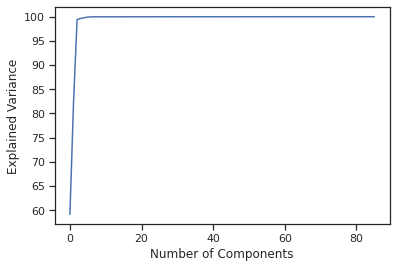

In [39]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_86.explained_variance_ratio_*100))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('pca_elbow_plot.png',dpi=100)

We will now apply PCA with 3 features and do a scatter plot for the same

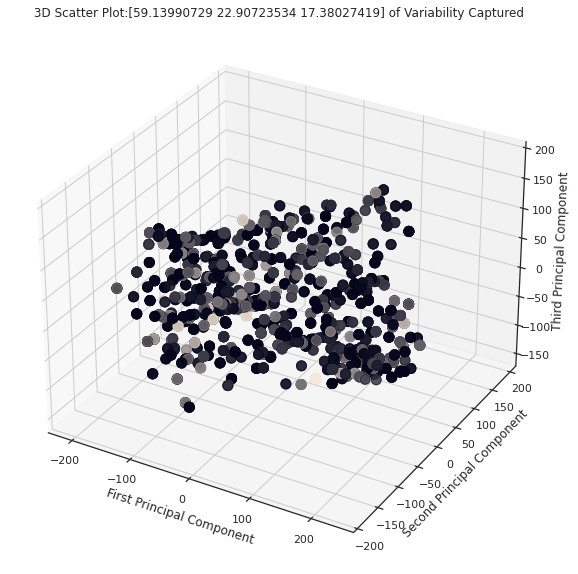

In [80]:
import seaborn as sns
from mpl_toolkits import mplot3d

pca_3 = PCA(n_components=3)
pca_3.fit(feature_df.values)
X_pca_3 = pca_3.transform(feature_df.values)

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2] , s=100, c=trimmed_df['match'], alpha=0.3)
plt.title( " 3D Scatter Plot:" + str(pca_3.explained_variance_ratio_*100) + " of Variability Captured ")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig('3dscatter_pca.png',dpi=100)

# Model 2

## Outline the challenge

Using the reduced dimensions we will try to see if we can predict a match for participants in Speed Dating. 

### Select the features and their justification

We had 86 features when we started and with the earlier model we found that the first 3 components account for 99.42% of the variance. Now while these 3 account for the variance it does not mean that they alone would be instrumental in finding a match. If we see the 3D Scatter Plot above we are not able to discern how the separation between Match = 0 and 1 is. 

However using PCA we can now extract the first 10-15 components and measure the accuracy

### Model Selection

I am selecting Random Forest Classifier mostly given some prior experience with it. It is an ensemble model and is robustness so I want to first see if I can get some basic metrics to indicate if my data cleansing and dimensionality reduction is working. I am going to be making use of the following metrics

<ul>
    <li>Accuracy</li>
    <li>True Positive Rate (TPR)</li>
    <li>False Positive Rate (FPR)</li>
    <li>F1 Score</li>
    <li>Precision</li>
    <li>Recall</li>
</ul>

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# iteration
feature_iter_step = 2
feature_start = 3
feature_end = 30

# We want to find the optimal depth given the list of features
FPR, TPR, assoc_pca, acc, precision, recall, f1, roc_auc = [], [], [], [], [], [], [], []

# While PCA tells us that the variance is explained by first 3 components it does not mean it will be 
for i in range(feature_start, feature_end, feature_iter_step):
    # Perform a PCA using the current iteration value for components
    pca_i = PCA(n_components=i, random_state=2020)
    pca_i.fit(feature_df.values)
    X_pca_i = pca_i.transform(feature_df.values)
    
    # Get X & y values
    X = X_pca_i 
    y = trimmed_df['match'].values
    
    # Obtain training and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify=y, random_state=0)
    
    pipe_lr = make_pipeline(RandomForestClassifier(max_depth=5, n_estimators=100, max_features=i, 
                                random_state=42))
    pipe_lr.fit(X_train, y_train)
    y_pred = pipe_lr.predict(X_test)
    y_pred_prob = pipe_lr.predict_proba(X_test)
    
    # Get basic metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR += [tp/(tp+fn)]  # Pd
    FPR += [fp/(fp+tn)]  # Pf

    #Store the PCA Components for the best value
    assoc_pca     += [i]
    
    # Get other metrics
    acc             += [pipe_lr.score(X_test, y_test)]
    precision       += [precision_score(y_test, y_pred)]
    recall          += [recall_score(y_test, y_pred)]
    f1              += [f1_score(y_test, y_pred)]
    roc_auc         += [roc_auc_score(y_test, y_pred)]

random_classifier_stats = np.column_stack((assoc_pca, acc, TPR, FPR, precision, recall, f1, roc_auc))
random_classifier_stats_df = pd.DataFrame(random_classifier_stats, columns = ['PCA Components','Accuracy',
                                                                              'True Positive Rate (TPR)',
                                                                              'False Positive Rate (FPR)',
                                                                              'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
display(HTML(random_classifier_stats_df.to_html()))           

,PCA Components,Accuracy,True Positive Rate (TPR),False Positive Rate (FPR),Precision,Recall,F1 Score,ROC AUC
0,3.000,0.835,0.000,0.001,0.000,0.000,0.000,0.500
1,5.000,0.834,0.000,0.001,0.000,0.000,0.000,0.499
2,7.000,0.834,0.000,0.001,0.000,0.000,0.000,0.499
3,9.000,0.835,0.004,0.001,0.500,0.004,0.007,0.501
4,11.000,0.987,0.946,0.005,0.974,0.946,0.960,0.970
5,13.000,0.987,0.946,0.004,0.978,0.946,0.961,0.971
6,15.000,0.987,0.942,0.004,0.981,0.942,0.961,0.969
7,17.000,0.992,0.964,0.002,0.989,0.964,0.976,0.981
8,19.000,0.991,0.964,0.004,0.982,0.964,0.973,0.980
9,21.000,0.992,0.964,0.003,0.985,0.964,0.974,0.980


We can see from the above metrics that between number of components 11 and 17 we received optimal scores for accuracy, high TPR and low FPR meaning the model is getting really good at predicting a match. Any number between 11 and 17 is still significantly less than the 86 features we started with which in turn was much lesser than 195 from the original dataset

PCA has a disadvantage that these final features cannot be comprehended and so we don't know what is actually influencing the decision. On the other hand in the case of this dataset, with all the different surveys taken, interests captured including the ones mid event, it was important to get a computation of their combined effect which is what PCA did for us